In [6]:
%pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import models, transforms
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define image folder path
image_folder = r"/home/ronodeep/thesisfinal-1/IARCImageBankColpo"

# Define CNN model (ResNet for feature extraction)
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
model.eval()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dictionary to store image features
image_features = {}

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Load images from folders
for case_id in sorted(os.listdir(image_folder)):
    case_path = os.path.join(image_folder, case_id)
    if os.path.isdir(case_path):
        print(f"Processing {case_id}...")
        for img_file in os.listdir(case_path):
            # Skip non-image files and Zone.Identifier files
            file_ext = os.path.splitext(img_file)[1].lower()
            if file_ext not in valid_extensions or "Zone.Identifier" in img_file:
                continue
                
            img_path = os.path.join(case_path, img_file)
            try:
                # Try using PIL directly instead of OpenCV
                img_pil = Image.open(img_path).convert('RGB')
                
                # Apply transformation
                img_transformed = transform(img_pil)
                img_transformed = img_transformed.unsqueeze(0)  # Add batch dimension

                with torch.no_grad():
                    feature = model(img_transformed).squeeze().numpy()  # Extract features

                image_features[img_path] = feature
                print(f"  Processed: {img_file}")
                
            except Exception as e:
                print(f"  Error processing {img_file}: {str(e)}")
                continue

print(f"Total features extracted: {len(image_features)}")

Processing Case 001...
  Processed: AAAW3.jpg
  Processed: AAAW2.jpg
  Processed: AAAW1.jpg
  Processed: AAAW4.jpg
Processing Case 002...
  Processed: AADE4.jpg
  Processed: AADE0.jpg
  Processed: AADE3.jpg
  Processed: AADE1.jpg
Processing Case 003...
  Processed: AADG0.jpg
  Processed: AADG1.jpg
  Processed: AADG2.jpg
  Processed: AADG3.jpg
Processing Case 004...
  Processed: AAEG0.jpg
  Processed: AAEG1.jpg
  Processed: AAEG2.jpg
Processing Case 005...
  Processed: AAER2.jpg
  Processed: AAER1.jpg
  Processed: AAER0.jpg
  Processed: AAER3.jpg
Processing Case 006...
  Processed: AAFU3.jpg
  Processed: AAFU0.jpg
  Processed: AAFU1.jpg
  Processed: AAFU2.jpg
  Processed: AAFU4.jpg
Processing Case 007...
  Processed: AAFY1.jpg
  Processed: AAFY4.jpg
  Processed: AAFY3.jpg
  Processed: AAFY0.jpg
Processing Case 008...
  Processed: AAFZ0.jpg
  Processed: AAFZ4.jpg
  Processed: AAFZ5.jpg
  Processed: AAFZ2.jpg
Processing Case 009...
  Processed: AAGB1.jpg
  Processed: AAGB0.jpg
  Processed

In [11]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install networkx


Note: you may need to restart the kernel to use updated packages.


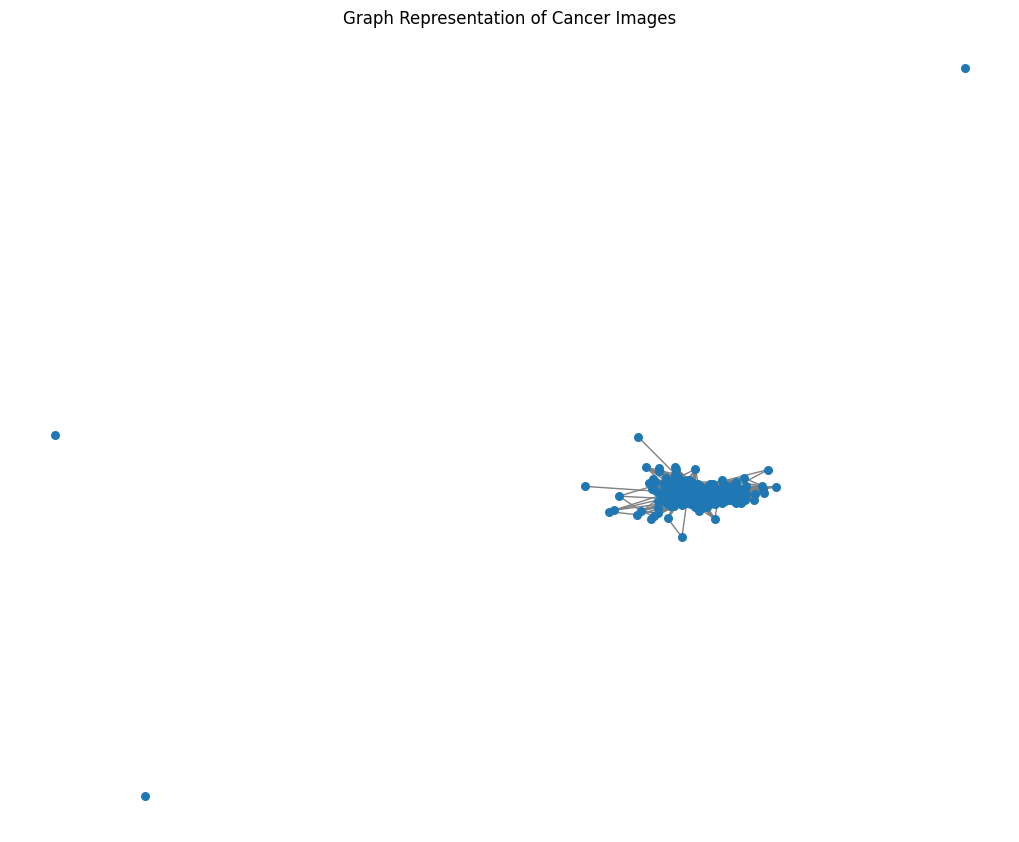

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph
G = nx.Graph()

# Add nodes
for img_path, feature in image_features.items():
    G.add_node(img_path, feature=feature)

# Compute edges based on similarity
image_paths = list(image_features.keys())
features = np.array(list(image_features.values()))

similarity_matrix = cosine_similarity(features)
threshold = 0.8  # Define a threshold for connectivity

for i in range(len(image_paths)):
    for j in range(i + 1, len(image_paths)):  # Avoid duplicate edges
        if similarity_matrix[i, j] > threshold:
            G.add_edge(image_paths[i], image_paths[j], weight=similarity_matrix[i, j])

# Visualize Graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=30, edge_color="gray")
plt.title("Graph Representation of Cancer Images")
plt.show()

In [26]:
import torch_geometric.utils as pyg_utils

# Convert NetworkX to PyG format
data = pyg_utils.from_networkx(G)

# Save graph dataset
torch.save(data, "cancer_graph_dataset.gml")

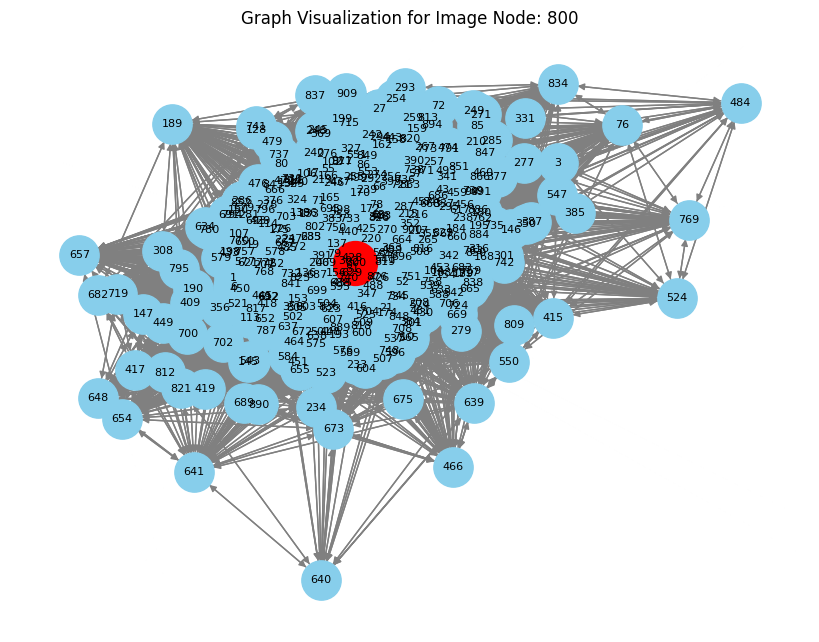

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


# Open the .gml file with the 'ISO-8859-1' encoding
graph_file = torch.load("cancer_graph_dataset.gml",weights_only=False)
G = to_networkx(graph_file)

# Select a random node (image) or the first image node
sample_node = list(G.nodes)[800]  # First node in the graph

# Get neighbors of the selected node (images similar to the sample)
neighbors = list(G.neighbors(sample_node))

# Create a subgraph for visualization
subG = G.subgraph([sample_node] + neighbors)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subG)  # Node positioning
nx.draw(subG, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=8)

# Highlight the main image node in red
nx.draw_networkx_nodes(subG, pos, nodelist=[sample_node], node_color="red", node_size=1000)

plt.title(f"Graph Visualization for Image Node: {sample_node}")
plt.show()


In [16]:
print(graph_file.num_nodes)
print(graph_file.num_edges)
print(graph_file.num_node_features)

913
298346
0


In [22]:
import pandas as pd
c = pd.read_csv(r"/home/ronodeep/thesisfinal-1/Cases_Meta_data.csv")
cases = c["Case Number"]


In [23]:
for i in cases:
    i = str(i)
    if len(i)==1:
        i= "00"+i
    elif len(i)==2:
        i="0"+i
    print("Case "+i)


Case 001
Case 002
Case 003
Case 004
Case 005
Case 006
Case 007
Case 008
Case 009
Case 010
Case 011
Case 012
Case 013
Case 014
Case 015
Case 016
Case 017
Case 018
Case 019
Case 020
Case 021
Case 022
Case 023
Case 024
Case 025
Case 026
Case 027
Case 028
Case 029
Case 030
Case 031
Case 032
Case 033
Case 034
Case 035
Case 036
Case 037
Case 038
Case 039
Case 040
Case 041
Case 042
Case 043
Case 044
Case 045
Case 046
Case 047
Case 048
Case 049
Case 050
Case 051
Case 052
Case 053
Case 054
Case 055
Case 056
Case 057
Case 058
Case 059
Case 060
Case 061
Case 062
Case 063
Case 064
Case 065
Case 066
Case 067
Case 068
Case 069
Case 070
Case 071
Case 072
Case 073
Case 074
Case 075
Case 076
Case 077
Case 078
Case 079
Case 080
Case 081
Case 082
Case 083
Case 084
Case 085
Case 086
Case 087
Case 088
Case 089
Case 090
Case 091
Case 092
Case 093
Case 094
Case 095
Case 096
Case 097
Case 098
Case 099
Case 100
Case 101
Case 102
Case 103
Case 104
Case 105
Case 106
Case 107
Case 108
Case 109
Case 110
Case 111
C